# Sheet 1

Some of the following exercieses are based on the tutorial https://medium.com/codebagng/basic-analysis-of-the-iris-data-set-using-python-2995618a6342.

# Exercise 1

## Load the data set

Although the following data set is already built into Python under the name "iris", we will retrieve it here from the internet introducing the command "read.csv".

In [ ]:
# Import the `pandas` library as `pd`
import pandas as pd
names = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Species']
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names = names)

Get the first five rows of the data set.

In [ ]:
iris.head(5)

Get a description of your data (type of variables, numbers, ...).

In [ ]:
iris.info

Factor variables represent categorical variables. They can thus take on a limited number of different values. Here, "Species" can take 3 values.

A quick look at the Species attribute through tells you that the number division of the species of flowers is 50-50-50.

In [4]:
iris.groupby('Species').size() 

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Note: You can also directly inspect the data set as a whole by simply typing "iris".

Let's not remain on this high-level overview of the data! Python gives you the opportunity to go more in-depth with the describe() function. This will give you the minimum value, first quantile, median, mean, third quantile and maximum value of the data set Iris for numeric data types. For the class variable, the count of factors will be returned:

In [5]:
iris.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


You can also refine your summary overview by adding specific attributes to the command that was presented above:

In [6]:
iris[['Petal_length','Petal_width']].describe()

,Petal_length,Petal_width
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


## Visualization

'matplotlib',https://matplotlib.org, is a powerful visualization tool for python.

In [7]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

Plot iris features 'Sepal_length' (x_axis) and 'Sepal_width' (y_axis) as a scatter plot, use different color to represent different classes

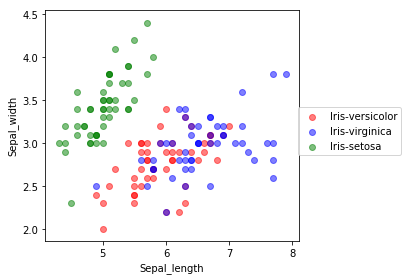

In [8]:
names = set(iris['Species'])

x,y = iris['Sepal_length'],  iris['Sepal_width']
plt.figure()
for name,color in zip(names,('red', 'blue', 'green')):
    cond = iris['Species'] == name
    plt.scatter(x[cond], y[cond], marker='o', label=name,color =color,alpha=0.5)

plt.legend(numpoints=1)
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))
plt.tight_layout()

Alternatively, one can also use Seaborn toolbox, https://seaborn.pydata.org/index.html, to provide a high-level interface for drawing attractive and informative statistical graphics. 

In [9]:
import seaborn as sns


# Use the 'hue' argument to provide a factor variable
sns.lmplot(x='Sepal_length', y='Sepal_width', data=iris, fit_reg=False, hue='Species', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')



ModuleNotFoundError: No module named 'seaborn'

You see that there is a high correlation between the sepal length and the sepal width of the Setosa iris flowers, while the correlation is somewhat less high for the Virginica and Versicolor flowers. 

This holds similarly for the petal length and the sepal width.

In [ ]:
x,y = iris['Petal_length'],  iris['Petal_width']
plt.figure()
for name,color in zip(names,('red', 'blue', 'green')):
    cond = iris['Species'] == name
    plt.scatter(x[cond], y[cond], marker='o', label=name,color=color,alpha=0.5)

plt.legend(numpoints=1)
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend(loc=9, bbox_to_anchor=(+1.2, 0.6))
plt.tight_layout()
#plt.axis([x.min()-0.1,x.max()+0.1,y.min()-0.1,y.max()+0.1])

You see that this graph indicates a positive correlation between the petal length and the petal width for all different species that are included into the Iris data set.

we can also use histogram to visualise data distribution

In [ ]:
plt.figure()
iris.groupby('Species').Petal_length.hist(alpha=0.4)
plt.title('Petal_length')
plt.figure()
iris.groupby('Species').Petal_width.hist(alpha=0.4)
plt.title('Petal_width')
plt.figure()
iris.groupby('Species').Sepal_length.hist(alpha=0.4)
plt.title('Sepal_length')
plt.figure()
iris.groupby('Species').Sepal_width.hist(alpha=0.4)
plt.title('Sepal_width')

After you have acquired a good understanding of your data, you have to decide on the use cases that would be relevant for your data set. In other words, you think about what your data set might teach you or what you think you can learn from your data. From there on, you can think about what kind of algorithms you would be able to apply to your data set in order to get the results that you think you can obtain. 

## Preparing the data

Many classifiers require normalization of the data set.

When do we need to normalize a dataset? In short: when you suspect that the data is not consistent. You can easily see this when you go through the results of the describe() function. Look at the minimum and maximum values of all the (numerical) attributes. If you see that one attribute has a wide range of values, you will need to normalize your dataset, because this means that the distance will be dominated by this feature. For example, if your dataset has just two attributes, X and Y, and X has values that range from 1 to 1000, while Y has values that only go from 1 to 100, then Y's influence on the distance function will usually be overpowered by X's influence. When you normalize, you actually adjust the range of all features, so that distances between variables with larger ranges will not be over-emphasised.

The Iris data set doesn't need to be normalized: the Sepal.Length attribute has values that go from 4.3 to 7.9 and Sepal.Width contains values from 2 to 4.4, while Petal.Length's values range from 1 to 6.9 and Petal.Width goes from 0.1 to 2.5. All values of all attributes are contained within the range of 0.1 and 7.9, which you can consider acceptable. 

Nevertheless, it's still a good idea to study normalization and its effect, especially if you're new to machine learning. You can perform feature normalization, for example, by first making your own normalize function:

In [ ]:
def normalise(x):
    num = x - np.min(x)
    denom = np.max(x) - np.min(x)
    return num/denom


You can then use this argument in another command, where you put the results of the normalization in a data frame through as.data.frame() after the function lapply() returns a list of the same length as the data set that you give in. Each element of that list is the result of the application of the normalize argument to the data set that served as input:

In [ ]:
import numpy as np

iris_norm = iris[['Petal_length', 'Petal_width','Sepal_length','Sepal_width']].apply(normalise)
iris_norm['Species'] = iris['Species']
iris_norm.head(5)

In [ ]:
iris_norm.describe()

In order to assess your model's performance later, you will need to divide the data set into two parts: a training set and a test set. The first is used to train the system, while the second is used to evaluate the learned or trained system. In practice, the division of your data set into a test and a training sets is disjoint: the most common splitting choice is to take 2/3 of your original data set as the training set, while the 1/3 that remains will compose the test set.

One last look on the data set teaches you that if you performed the division of both sets on the data set as is, you would get a training class with all species of “Setosa” and “Versicolor”, but none of “Virginica”. The model would therefore classify all unknown instances as either “Setosa” or “Versicolor”, as it would not be aware of the presence of a third species of flowers in the data. In short, you would get incorrect predictions for the test set.

You thus need to make sure that all three classes of species are present in the training model. What's more, the amount of instances of all three species needs to be present at more or less the same ratio as in your original data set.

To make your training and test sets, you first set a seed. This is a number of R's random number generator. The major advantage of setting a seed is that you can get the same sequence of random numbers whenever you supply the same seed in the random number generator. 

In [ ]:
np.random.seed(1234)

Then, you want to make sure that your Iris data set is shuffled and that you have the same ratio between species in your training and test sets. You use the sample() function to take a sample with a size that is set as the number of rows of the Iris data set, or 150. You sample with replacement: you choose from a vector of 2 elements and assign either 0 or 1 to the 150 rows of the Iris data set. The assignment of the elements is subject to probability weights of 0.67 and 0.33.


In [ ]:
ind = np.random.choice(2, iris[iris.columns[0]].count(), replace=True,p=[0.67,0.33])
print(ind)


Note that the replace argument is set to TRUE: this means that you assign a 0 or a 1 to a certain row and then reset the vector of 2 to its original state. This means that, for the next rows in your data set, you can either assign a 0 or a 1, each time again. The probability of choosing a 1 or a 2 should not be proportional to the weights amongst the remaining items, so you specify probability weights.

Remember that you want your training set to be 2/3 of your original data set: that is why you assign “0” with a probability of 0.67 and the “1"s with a probability of 0.33 to the 150 sample rows.

You can then use the sample that is stored in the variable ind to define your training and test sets:


In [ ]:
iris_trainFeatures = iris.loc[ind==0,iris.columns[0:4]]
iris_testFeatures = iris.loc[ind==1,iris.columns[0:4]]
print(iris_trainFeatures.count())
print(iris_testFeatures.count())

 Note that, in addition to the 2/3 and 1/3 proportions specified above, you don't take into account all attributes to form the training and test sets. Specifically, you only take Sepal.Length, Sepal.Width, Petal.Length and Petal.Width. This is because you actually want to predict the fifth attribute, Species: it is your target variable. However, you do want to include it into the KNN algorithm, otherwise there will never be any prediction for it. You therefore need to store the class labels in factor vectors and divide them over the training and test sets.


In [ ]:
iris_trainLabels = iris.loc[ind==0,iris.columns[4]]
iris_testLabels = iris.loc[ind==1,iris.columns[4]]
print(iris_trainLabels.count())
print(iris_testLabels.count())

## k nearest neighbor classifier

Python has a powerful machine learning package scikit-learn, including k nearest neighbor classifier (KNN). The theory of KNN will be covered in the lecture. One can also refer to scikit-learn knn documentation for practical guidance: http://scikit-learn.org/stable/modules/neighbors.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

After all these preparation steps, you have made sure that all your known (training) data is stored. No actual model or learning was performed up until this moment. Now, you want to find the k nearest neighbors of your training set.

An easy way to do these two steps is by using the KNeighborsClassifier function, which uses the Euclidian distance measure in order to find the k-nearest neighbours to your new, unknown instance. Here, the k parameter is one that you set yourself. As mentioned before, new instances are classified by looking at the majority vote or weighted vote. In case of classification, the data point with the highest score wins the battle and the unknown instance receives the label of that winning data point. If there is an equal amount of winners, the classification happens randomly.

Note the k parameter is often an odd number to avoid ties in the voting scores.
 
To build your classifier, you need to take the KNeighborsClassifier function and simply add some arguments to it, just like in this example:

Note KNeighborsClassifier function only takes numpy arrays, so we have to change pandas format into numpy array using .values


In [ ]:
X = iris_trainFeatures.values;
y = iris_trainLabels.values;
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X, y) 
iris_predLabels = knnmodel.predict(iris_testFeatures.values)
print(iris_predLabels)

You store into knnmodel the KNeighborsClassifier function that fits to the training set, and iris_predLabels as the predictions for the test set.

Note that you don't want to insert the test labels: these will be used to see if your model is good at predicting the actual classes of your instances!

You can retrieve the result of the KNeighborsClassifier function by typing in the following command:


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(iris_testLabels,iris_predLabels)

You see that the model makes reasonably accurate predictions, with the accuracy higher than 0.95.

This is already some indication of your model's performance, but you might want to go even deeper into your analysis. For this purpose, you can get confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris_testLabels,iris_predLabels)

Then you can make a cross tabulation or a contingency table. This type of table is often used to understand the relationship between two variables. In this case, you want to understand how the classes of your test data, stored in iris.testLabels relate to your model that is stored in iris_pred:

## Random Forest

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance. Again, the theory of Random Forest will be covered in the lecture, but one can refer to https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for practical guidance.

First, normalize feature vectors. In additional to above approach, a more convient way is to use Sklearn build-in normalize function

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

X=iris[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']]  # Features
y=iris['Species']  # Labels

# Normalise features
X_norm =normalize(X)


Second, split training and test data. Again, we can use Sklearn build-in train_test_split function

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3) # 70% training and 30% test

After splitting, you will train the model on the training set.

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

Perform predictions on the test set

In [ ]:
y_pred=clf.predict(X_test)

Again, one can retrieve the result of the RandomForestClassifier function by typing in the following command:

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

## Finding Important Features in Scikit-learn##

One of the most important advantages of random forest is that it is able to find the feature importance 

In [ ]:
clf.feature_importances_

For visualization, you can use a combination of matplotlib and seaborn. Because seaborn is built on top of matplotlib, it offers a number of customized themes and provides additional plot types.

In [ ]:
import pandas as pd
import seaborn as sns
feature_names = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width'] # This should be consistent with X=iris[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']] 
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()